[SOFTEX] Residência em TIC - MCTI Futuro - IFMA 

# 3. - Ciência de Dados com Python
## 3.1 - Operações vetoriais com biblioteca NumPy

Este notebook é parte do material do Curso de Treinamento em IA criado pelo IFMA/DComp e financiado pelo SOFTEX, 2023.

Elaborado por Prof. Josenildo Silva (jcsilva@ifma.edu.br)

**Nota:** Esta aula se baseia no cap.4 do livro "Python for Data Analysis" de Wes McKINNEY. Outras referências no final desta aula. 

In [1]:
!python -V # versão do python (no win10)

Python 3.10.7


## Introdução

**Numpy** é uma abreviação de Numerical Python. O NumPy provê operações aritiméticas com vetores e matrizes de modo similar ao Matlab ou Octave.   O NumPy serve de base para várias bibliotecas científicas. 

NumPy possui funções para álgebra linear, geração de números aleatórios, transformadas de Fourier, etc. 

In [2]:
import numpy as np

In [3]:
np.version.version

'1.24.1'

In [4]:
np.__version__

'1.24.1'

Por convenção, o numpy é importado como `np`. É possivel fazer também from numpy import `*`. Entretanto, esta prática não é recomendável, pois o numpy possui vários objetos cujos nomes conflitam com objetos padrão do python.  

## O Objeto ndarray

A principal estrutura de dados do NumPy é o *ndarray* que oferece velocidade superior a estrutura nativas do Python.  Um ndarray é um container genérico para valores homogêneos, i.e. todos os elementos tem o mesmo tipo.

### Criação de ndarrays

Para criar ndarray podemos utilizar uma das seguintes funções:
- np.array()
- np.arange()
- np.linspace()
- np.zeros()
- np.eye()
- np.ones()
- np.empty()
- np.full()

**`np.array()`** cria um ndarray a partir de uma lista ou tupla

In [5]:
a = np.array([1,2,3])
print(a)
#a?
type(a)

[1 2 3]


numpy.ndarray

A lista pode conter outras listas, mas todas devem ter o mesmo tamanho. 

In [6]:
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [7]:
a = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


<span style="color:red">Atenção:</span> Um erro comum é passar vários argumentos  **e não uma lista**  para o `np.array()`

In [7]:
errado = np.array(1,2,3) ## Gera um ValueError: only 2 non-keyword arguments accepted

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

**`arange()`** cria um ndarray de valores igualmente espaçados em uma faixa definida

In [8]:
a = np.arange(12)
print("a =",a)

a = [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [9]:
a = np.arange(5,12)
print("b =",a)

b = [ 5  6  7  8  9 10 11]


**`linspace()`** gerar uma quantidade de números espaçados igualmente em um dado intervalo. Seu uso é frequente em geração de gráficos

In [10]:
a = np.linspace(6,10,9)
print(f"a = {a}")

# mesmo resultado com arange 
b = np.arange(6,10.1,0.5)   
print(f"b = {b}")

a = [ 6.   6.5  7.   7.5  8.   8.5  9.   9.5 10. ]
b = [ 6.   6.5  7.   7.5  8.   8.5  9.   9.5 10. ]


**`zeros()`** cria um ndarray inicializados com zeros. Para um ndarray multidimensional informe uma tupla com as dimensoes.

In [11]:
a = np.zeros(5)
print(a)

[0. 0. 0. 0. 0.]


Pode-se passar uma tupla para a função **`zeros()`**

In [12]:
d= (2,3) # tupla de dimensões
a = np.zeros(shape=d) 
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


**`ones()`** cria uma matriz com 1's  a partir de uma tupla de dimensões

In [13]:
a = np.ones(shape=(4,3))
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


A função **`eye()`** cria uma matriz quadrada com diagonal 1 a partir do tamanho informado

In [14]:
a = np.eye(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Eye com 3x4 cuja diagonal principal é a 2

In [15]:
a = np.eye(3,4,k=2)
a

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

Eye com 3x3 e diagonal principal é a 1

In [16]:
a = np.eye(3,k=1)
print(a)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


**`identity()`** cria uma matriz quadrada com 1s na sua diagonal.

In [17]:
a= np.identity(4)
print(a)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


**`full()`** criar um array com as dimensões fornecidas em uma tupla e preenchido com o valor informado.

In [18]:
a= np.full((3,4),9)
print(a)

[[9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]


O numpy possui ainda as funções `zero_like()`, `ones_like()`, `full_like()`, e `empty_like()`, que criam uma matriz com as dimensões e o tipo de uma matriz fornecida. 

<div style="background-color:gainsboro;padding:15px">
    
**Atenção:** o numpy provê a função `np.empty()` que cria um array mais não o inicializa. Ela pode ser um pouco mais rápida que `np.array()` mas exige posterior inicialização já que a área de memória utilizada deve estar preenchida com valores aleatórios. **O seu uso é desencorajado.**
   
<div>

### Tipos com dtype 

O Numpy utiliza o objeto Data Type (`dtype`) para especificar o formato de dados de cada elemento de um `ndarray`. Um `dtype` pode ser visto como um struct em linguagem C, como diz McKINNEY no Apendice A, seção 5 do seu "Python for Data Analysis": 

> "an ndarray in which each element can be thought of as representing a struct in C (hence
the “structured” name) or a row in a SQL table with multiple named fields." (McKINNEY, 2017)

O Numpy define vários tipos prontos para a utilização. Os principais são: `int`, `float`, `complex`, `bool`, `object`, `string_` e `unicode_`. 

Os tipos dtype são indicados por um nome e um número. Por exemplo, `int32`, `uint32`. 

O tipo de dados do array pode ser consultado no atributo `dtype`.

In [19]:
a = np.array([[1,2,3],[4,5,6]])
print(a.dtype)

int32


Não confunda um **dtype** com um tipo básico de python. Os tipos básicos são utilizados na construção dos dtypes. Neste ponto, a analogia com o struct do C é muito boa, pois é fácil imaginar um struct construida a partir de tipos básicos do C.

O método `mro()` informa qual a ordem de resolução de métodos de um determinado tipo e serve também para termos uma ideia da hierarquia de tipos do NumPy. 

In [20]:
np.int32.mro()

[numpy.int32,
 numpy.signedinteger,
 numpy.integer,
 numpy.number,
 numpy.generic,
 object]

O Numpy define os seguintes tipos
<img src="./numpy-hierarquia-tipos.png">

O método **`astype()`** converte entre tipos compatíveis. Por exemplo de `int` para `float`. Se a conversão não for possível, um erro `ValueError` será lançado pelo interpretador. 

In [21]:
print(a.dtype)
b = a.astype('float')       # ou a.astype(np.float64)
print(b.dtype)

int32
float64



Tamanho de um item em bytes

In [22]:
c = np.array([[1,2,3,4],[5,6,7,8]])
print(c)

[[1 2 3 4]
 [5 6 7 8]]


In [23]:
print(f"um elemento de a: {a.itemsize} bytes")
print(f"um elemento de b: {b.itemsize} bytes")
print(f"um elemento de c: {c.itemsize} bytes")

um elemento de a: 4 bytes
um elemento de b: 8 bytes
um elemento de c: 4 bytes


Quantidade de itens no array

In [24]:
print(f'a tem {a.size} itens')
print(f'b tem {b.size} itens')
print(f'c tem {c.size} itens')

a tem 6 itens
b tem 6 itens
c tem 8 itens


Total de bytes ocupado pelo array

In [25]:
print(a.nbytes)
print(b.nbytes)
print(c.nbytes)

24
48
32


O formato do array é armazenado na atributo `shape`.

In [26]:
a.shape

(2, 3)

### Indexação e Fatiamento

#### Arrays de 1 dimensão 

O acesso aos itens de um ndarray de uma dimensão é igual ao acesso de listas simples em Python

In [27]:
a = np.arange(5)*3.16
print(a)

[ 0.    3.16  6.32  9.48 12.64]


Acessar o n-ésimo elemento com colchetes `a[n]`

In [28]:
a[3]

9.48

Uma **fatia (slice, ou sublista)** é uma visão da lista e não uma cópia. 

In [29]:
a[2:4] # o itervalo é semi aberto  (não inclui o índice final)

array([6.32, 9.48])

Utilizando uma fatia pode-se fazer atribuição de valores _modificando a lista original_. 

In [30]:
a[2:4]= 10
print(a)

[ 0.    3.16 10.   10.   12.64]


Uma fatia pode ser indexada de modo independente, ainda que seja uma visão da lista original.

In [31]:
fatia_a = a [2:4]
print(a)

[ 0.    3.16 10.   10.   12.64]


In [32]:
fatia_a[0] = 25 # modifica a lista original
print(fatia_a)
print(a)

[25. 10.]
[ 0.    3.16 25.   10.   12.64]


O método **`copy()`** produz uma cópia de um **array** ou **fatia**.

In [33]:
b = a[2:4].copy()
b[0] = 99 # não modifica a lista original
print(a)
print(b)

[ 0.    3.16 25.   10.   12.64]
[99. 10.]


A forma **`[:]`** inclui todos os elementos de uma dada dimensão na fatia. 


In [34]:
fatia_a = a[:]
fatia_a

array([ 0.  ,  3.16, 25.  , 10.  , 12.64])

#### Arrays de 2 dimensões

In [35]:
a2d = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a2d)
print(f"shape:{a2d.shape}")

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
shape:(3, 4)


In [41]:
print(a2d[0]) # elemento da linha 0 é um array de 4 elementos

[1 2 3 4]


In [42]:
print(a2d[0][0]) # notação recursiva, primeiro elemento do primeiro elemento de a2d

1


In [43]:
print(a2d[0,0]) # notação simplificada

1


Uma maneira de visualizar um array de 2 dimensões em numpy é demonstrado na imagem abaixo

<img src="numpy-2d-arrays.png" style="height:300px" align="left">

<span> Fonte: McKENNEY, 2017 </span>

#### Arrays de dimensões superiores

Se informarmos apenas as primeiras dimensões omitindo as demais, a fatia retornada será da quantidade de dimensões restantes. 

In [44]:
a3d = np.array([[[1,2],[3,4],[5,6]],[[7,8],[9,10],[11,12]]])
print(a3d)
print(a3d.shape)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]
(2, 3, 2)


Exemplos de fatiamento em altas dimensões

In [45]:
a3d[0]

array([[1, 2],
       [3, 4],
       [5, 6]])

In [46]:
a3d[0,1]

array([3, 4])

In [47]:
a3d[0,1,1]

4

In [48]:
a3d[0,0]

array([1, 2])

In [49]:
a3d[0,2]

array([5, 6])

In [50]:
a3d[0,0,0]

1

Novamente, se um escalar for atribuido a uma fatia, todos os elementos da fatia são substituidos. 

In [51]:
a3d[0] = 99
a3d

array([[[99, 99],
        [99, 99],
        [99, 99]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

In [52]:
a3d[0,1]=88
a3d

array([[[99, 99],
        [88, 88],
        [99, 99]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

Similarmente, podemos atribuir arrays para fatias

In [53]:
a3d[0,2]=np.array([77,77])
a3d

array([[[99, 99],
        [88, 88],
        [77, 77]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

Arrays de muitas dimensões também podem ser fatiados usando a mesma notação que arrays 1-d.

In [54]:
a3d[1:]

array([[[ 7,  8],
        [ 9, 10],
        [11, 12]]])

In [55]:
a3d[0,1:,:]

array([[88, 88],
       [77, 77]])

In [56]:
a3d[1:,1:,1:]

array([[[10],
        [12]]])

McKINNEY faz um resumo visual de slices, reproduzido abaixo

<img src="numpy-2d-slices.png" style="height:300px">

#### Indexação Booleana

Podemos utilizar uma expressão booleana para indexar um array.

In [57]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [58]:
a % 2 == 0 # somente números pares

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [59]:
a[a%2==0] # pares

array([0, 2, 4, 6, 8])

In [60]:
a[a>5] # somente maiores que 15

array([6, 7, 8, 9])

In [61]:
a[(a%2==0) & ~(a<5)]

array([6, 8])

#### Função `where()`

In [62]:
x = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y = np.array([2.1, -2.2, 0.3, 2.4, 0.5])

In [63]:
cond = x>y
print(cond)

[False  True  True False  True]


In [64]:
z= np.where(cond, x, y) # x if cond else y
print(z)

[2.1 1.2 1.3 2.4 1.5]


#### Fancy indexing

In [65]:
max_rows=6
max_cols=3
a2d = np.arange(max_rows*max_cols)
a2d=a2d.reshape(max_rows,max_cols)
a2d

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

Considere a matriz acima. Já sabemos acessar um elemento individual dados suas coordenadas. Por exemplo

In [66]:
a2d[2,0]

6

In [67]:
a2d[0,1]

1

In [68]:
a2d[5,1]

16

Podemos passar uma lista de indices que serão interpretados como indice da maior dimensão 

In [69]:
print(a2d[[5,2]])

[[15 16 17]
 [ 6  7  8]]


Podemos especificar uma lista para um dimensão apenas

In [70]:
a2d[:,[1,0]]            # todas as linhas, mas apenas as colunas 2 e 0, nesta ordem

array([[ 1,  0],
       [ 4,  3],
       [ 7,  6],
       [10,  9],
       [13, 12],
       [16, 15]])

In [71]:
a2d[[2,0],:] # apenas linhas 2 e 0, nesta ordem, e todas as colunas

array([[6, 7, 8],
       [0, 1, 2]])

Podemos gerar um array de elementos a partir de indices dos elementos que queremos acesar. Para isso, precisamos passar uma lista de indices com as linhas e uma lista com as colunas, ambas do mesmo tamanho. 

In [72]:
a2d[[2,0,5],[0,1,1]]

array([ 6,  1, 16])

<div style="background-color:gainsboro;padding:15px">
    
**Atenção:** O fancy indexing sempre copia o conteúdo para um novo array, ao contrário de fatiamento que apenas gera uma visão.    
<div>

Como saber se um array é uma view?

In [73]:
a = np.array([1,2,3,4,5])
b = a[2:4]
c = a[2:4].copy()

O atibuto base nas views aponta para o array original. Os arrays originais tem base igual a `None`

In [74]:
print(f"array b = {b} com base {b.base}")
print(f"array c = {c} com base {c.base}")

array b = [3 4] com base [1 2 3 4 5]
array c = [3 4] com base None


### Propagação (Broadcasting)

_Broadcasting_ é uma técnica que permite a utilização de dois arrays de dimensões diferentes em uma operação. O array menor é completado virtualmente na sua dimensão menor para atingir o tamanho do array maior. 
No *broadcasting*, dados dois arrays a (maior) e b (menor), deve-se ter:
- ultimas dimensões são iguais 
- penultima são iguais e ultima do menor (b) é  1.   

*Exemplo*: Pode-se fazer o broadcasting de um escalar para um vetor. 

In [75]:
c = np.array(5) # escalar
print(c)
print(f"shape = {c.shape}") # vazio
print(f"dimensoes = {c.ndim}") # zero

5
shape = ()
dimensoes = 0


In [77]:
a = np.arange(7)
print(a)
print(f"shape = {a.shape}") 
print(f"dimensoes = {a.ndim}")

[0 1 2 3 4 5 6]
shape = (7,)
dimensoes = 1


In [78]:
print(a*c)

[ 0  5 10 15 20 25 30]


*Exemplo*: Utilizando uma matriz e um vetor, o vetor será propagado. Ambos devem ter a ultima dimensão de mesmo tamanho ou 1.

In [113]:
a = np.arange(12).reshape((4,3))
print(a)
print(f"shape = {a.shape}") 
print(f"dimensoes = {a.ndim}")

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
shape = (4, 3)
dimensoes = 2


In [114]:
b = np.empty((3))                   # ultima de a igual a ultima de b 
b[:] =np.array([0,1,2])             # com uma dimensão ausente
print(b)
print(f"shape = {b.shape}") 
print(f"dimensoes = {b.ndim}")

[0. 1. 2.]
shape = (3,)
dimensoes = 1


In [117]:
print(a+b)                         # b será expandido para shape (4,3) 

[[ 0.  2.  4.]
 [ 3.  5.  7.]
 [ 6.  8. 10.]
 [ 9. 11. 13.]]


In [84]:
a = np.arange(12).reshape((3,4))
print(a)
print(f"shape = {a.shape}") 
print(f"dimensoes = {a.ndim}")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
shape = (3, 4)
dimensoes = 2


In [85]:
b=np.array([0,1,2]).reshape((3,1))    # penultimas iguais e ultima de menor é 1
print(b)
print(f"shape = {b.shape}") 
print(f"dimensoes = {b.ndim}")

[[0]
 [1]
 [2]]
shape = (3, 1)
dimensoes = 2


In [86]:
print(a+b)

[[ 0  1  2  3]
 [ 5  6  7  8]
 [10 11 12 13]]


In [87]:
a = np.arange(12).reshape((4,3))
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [88]:
b = np.empty((4,1))
b[:] =np.array([0,1,2,4]).reshape((4,1))
print(b)

[[0.]
 [1.]
 [2.]
 [4.]]


In [89]:
print(a+b)

[[ 0.  1.  2.]
 [ 4.  5.  6.]
 [ 8.  9. 10.]
 [13. 14. 15.]]


In [90]:
a = np.ones((2,4,3))
a[1]=2
print(a)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]]


In [91]:
b = np.arange(12).reshape((4,3))  # tente arange(3).reshape(3), ou arange(4).reshape(4,1), ou arange(12).reshape(4,3)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [92]:
print(a+b)

[[[ 1.  2.  3.]
  [ 4.  5.  6.]
  [ 7.  8.  9.]
  [10. 11. 12.]]

 [[ 2.  3.  4.]
  [ 5.  6.  7.]
  [ 8.  9. 10.]
  [11. 12. 13.]]]


In [93]:
b = np.arange(2).reshape((2,1,1))
print(b)

[[[0]]

 [[1]]]


In [94]:
print(a+b)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]
  [3. 3. 3.]]]


###### O objeto `np.broadcast`

O objeto `np.broadcast` pode ser utilizado indicar qual será o formato do broacast entre dois ndarrays. 

In [118]:
x = np.array([[1], [2], [3]])
print(x)
x.shape

[[1]
 [2]
 [3]]


(3, 1)

In [119]:
y = np.array([4, 5, 6])
#print(y)
y.shape

(3,)

In [120]:
b = np.broadcast(x, y)

In [121]:
print(b.shape)

(3, 3)


## Forma, Concatenação e Separação 

### Forma

A modo mais simples e claro de mudar a forma de um array é com reshape()

In [124]:
a = np.arange(1,7)
print(a)

[1 2 3 4 5 6]


In [125]:
a.reshape((-1,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [126]:
a.reshape((2,-1))

array([[1, 2, 3],
       [4, 5, 6]])

Também é possível utilizar `np.newaxis` ou `None` quando o objetivo é apenas criar uma nova dimensão. 

Ex: novo vetor linha

In [127]:
a = np.arange(1,7)
print(a)

[1 2 3 4 5 6]


In [128]:
a.reshape(1,6)

array([[1, 2, 3, 4, 5, 6]])

In [129]:
a[np.newaxis,:]

array([[1, 2, 3, 4, 5, 6]])

In [130]:
a[None,:]

array([[1, 2, 3, 4, 5, 6]])

Ex: nova matriz coluna

In [132]:
a.reshape(6,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [100]:
a[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [101]:
a[:,None]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

### Concatenação

`np.concatenate()`

In [261]:
a = np.array([1, 2, 3,])
b = np.array([4, 5, 6])
c = np.array([7, 8, 9])
np.concatenate([a, b,c])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Pode-se indicar a direção da concatenação com axis

In [134]:
a = np.array([[1, 2, 3,], [4, 5, 6]])
b = np.array([[7,8,9]])

In [135]:
np.concatenate([a,b],axis=0) # default, linhas

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

`axis =1` indica direção horizontal, ou colunas

In [136]:
a = np.array([[1, 2, 3,], [4, 5, 6]])
b = np.array([[7],[8]])

In [137]:
np.concatenate([a,b],axis=1)

array([[1, 2, 3, 7],
       [4, 5, 6, 8]])

`axis = None` remove a dimensão dos arrays (flatten) antes de concatená-los 

In [138]:
a = np.array([[1, 2, 3,], [4, 5, 6]])
b = np.array([[7,8]])

In [139]:
np.concatenate([a,b],axis=None)

array([1, 2, 3, 4, 5, 6, 7, 8])

`np.vstack` e `np.hstack`

In [140]:
a = np.array([[1, 2, 3,], [4, 5, 6]])
b = np.array([7,8,9])
np.vstack([a,b])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [141]:
a = np.array([[1, 2, 3,], [4, 5, 6]])
b = np.array([[7],[8]])
np.hstack([a,b])

array([[1, 2, 3, 7],
       [4, 5, 6, 8]])

Separação

In [142]:
a = np.linspace(1,7,13)
a

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ])

In [143]:
np.split(a,[2,5]) # divide em parte de qualquer tamanho

[array([1. , 1.5]),
 array([2. , 2.5, 3. ]),
 array([3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ])]

Pode-se indicar o `axis`

In [144]:
a = np.arange(1,7).reshape(2,3)
print(a)

[[1 2 3]
 [4 5 6]]


In [145]:
np.split(a,[2],axis=1)

[array([[1, 2],
        [4, 5]]),
 array([[3],
        [6]])]

`hsplit` e `vsplit` 

In [146]:
a = np.arange(1,7)
np.hsplit(a,[2,5])

[array([1, 2]), array([3, 4, 5]), array([6])]

In [147]:
a = np.arange(1,7).reshape(2,3)
np.hsplit(a,[2])

[array([[1, 2],
        [4, 5]]),
 array([[3],
        [6]])]

## Funções Universais

Uma função universal (`ufunc`) realiza uma operação elemento à elemento em ndarrays. São implementadas em código compilado

### Operações Aritméticas

Existem `ufuncs` para as principais operações, tais como +, - , /, etc.  

<img src="numpy-ufuncs-basicas.png" style="height:350px">

Os operadores são apenas um modo conveniente de chamar as ufuncs mais básicas.

Operações matemáticas com ndarrays são escritas como se fossem números escalares

In [148]:
a = np.arange(1,10)
print(a)

[1 2 3 4 5 6 7 8 9]


In [149]:
print(a + 5)

[ 6  7  8  9 10 11 12 13 14]


In [150]:
print(a -5)

[-4 -3 -2 -1  0  1  2  3  4]


In [151]:
print(a * 5)

[ 5 10 15 20 25 30 35 40 45]


In [152]:
print(a /5) # divisão float

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]


In [153]:
print(a//2) # divisão int

[0 1 1 2 2 3 3 4 4]


In [154]:
print(a**2) # power

[ 1  4  9 16 25 36 49 64 81]


In [155]:
print(-a) # minus

[-1 -2 -3 -4 -5 -6 -7 -8 -9]


In [156]:
print(a %2) #modulo

[1 0 1 0 1 0 1 0 1]


Dados dois ndarrays podemos escrever simplesmente `+` e não `np.add(a,b)`

In [157]:
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

In [158]:
c = np.add(a,b) # ufunc
d = a+b # modo abreviado
print(c)
print(d)

[ 6  8 10 12 14]
[ 6  8 10 12 14]


In [159]:
print(a+b)

[ 6  8 10 12 14]


In [160]:
print(a * b)

[ 5 12 21 32 45]


In [161]:
print(a/b)

[0.2        0.33333333 0.42857143 0.5        0.55555556]


In [162]:
print(b//a)

[5 3 2 2 1]


In [163]:
print(a ** b)

[      1      64    2187   65536 1953125]


In [164]:
print(b % a)

[0 0 1 0 4]


Há também ufuncs sqrt, square, abs, exp, log, log10, log2, log1p, sign, ceil, floor, cos, cosh, sin,arccos, arccosh,
arcsin, arcsinh, entre outras.

In [165]:
a = np.array([-2, -1, 0, 1, 2])
abs(a) # função nativa python (não funciona com lista)

array([2, 1, 0, 1, 2])

In [166]:
np.abs(a) # método numpy (funciona com listas)

array([2, 1, 0, 1, 2])

In [167]:
theta = np.linspace(0, np.pi, 5)
print(theta)

[0.         0.78539816 1.57079633 2.35619449 3.14159265]


In [168]:
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         0.78539816 1.57079633 2.35619449 3.14159265]
sin(theta) =  [0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
 1.22464680e-16]
cos(theta) =  [ 1.00000000e+00  7.07106781e-01  6.12323400e-17 -7.07106781e-01
 -1.00000000e+00]
tan(theta) =  [ 0.00000000e+00  1.00000000e+00  1.63312394e+16 -1.00000000e+00
 -1.22464680e-16]


In [169]:
a =np.array([1, 2, 3])
print("a =", a)
print("e^a =", np.exp(a))
print("2^a =", np.exp2(a))
print("3^a =", np.power(3, a))

a = [1 2 3]
e^a = [ 2.71828183  7.3890561  20.08553692]
2^a = [2. 4. 8.]
3^a = [ 3  9 27]


In [170]:
a = np.array([1, 10, 100, 1000])
print("a =", a)
print("ln(a) =", np.log(a))
print("log2(a) =", np.log2(a))
print("log10(a) =", np.log10(a))

a = [   1   10  100 1000]
ln(a) = [0.         2.30258509 4.60517019 6.90775528]
log2(a) = [0.         3.32192809 6.64385619 9.96578428]
log10(a) = [0. 1. 2. 3.]


In [171]:
a =np.array([0, 0.001, 0.01, 0.1])
print("exp(a) - 1 =", np.expm1(a))
print("log(1 + a) =", np.log1p(a))

exp(a) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + a) = [0.         0.0009995  0.00995033 0.09531018]


Ao trabalhar com ndarrays com mais dimensoes podemos definir eixos ao aplicar uma ufunc

In [172]:
a = np.arange(15).reshape(3,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [173]:
np.sum(a)

105

In [174]:
np.sum(a,axis=None) 

105

In [175]:
np.sum(a,axis=0) 

array([15, 18, 21, 24, 27])

In [176]:
np.sum(a,axis=1)

array([10, 35, 60])

## Álgebra Linear

Produto escalar e Multiplicação de Matrizes

In [177]:
a = np.arange(4)
print(a)
np.dot(a,a)  # soma da multiplicação dos elementos de um vetor


[0 1 2 3]


14

Produto Escalar

$ \mathbf{x} \cdot \mathbf{y} = \sum_{i=1}^n x_i y_i$

In [179]:
def prod_esc(x,y): # para 1d arrays
    resultado = 0
    for i in range(len(x)):
        resultado += x[i] * y[i]
    return resultado

In [180]:
a = np.arange(1,4)
b = np.arange(4,7) 
print(a)
print(b)

[1 2 3]
[4 5 6]


In [181]:
prod_esc(a,b)

32

In [182]:
a.dot(b)

32

In [183]:
a@b

32

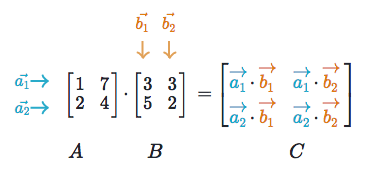

In [184]:
A = np.array([[1., 2., 3.], [4., 5., 6.]])
B = np.array([[6., 23.], [-1, 7], [8, 9]])


In [185]:
np.matmul(A,B) # mais recente e mais eficiente

array([[ 28.,  64.],
       [ 67., 181.]])

In [186]:
np.dot(A,B) # ou A.dot(B)

array([[ 28.,  64.],
       [ 67., 181.]])

In [187]:
A @ B # em python 3.5+

array([[ 28.,  64.],
       [ 67., 181.]])

Diagonal

In [188]:
print(A)
np.diag(A)

[[1. 2. 3.]
 [4. 5. 6.]]


array([1., 5.])

Traço

In [189]:
np.trace(A)

6.0

### Subpacote LinAlg

In [190]:
A = np.array([[1,3,-2],[3,5,6],[2,4,3]])
print(A)

[[ 1  3 -2]
 [ 3  5  6]
 [ 2  4  3]]


Matriz inversa 

In [191]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 2.25  4.25 -7.  ]
 [-0.75 -1.75  3.  ]
 [-0.5  -0.5   1.  ]]


In [192]:
A_inv @ A

array([[ 1.00000000e+00, -3.55271368e-15, -3.55271368e-15],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

Determinante

In [193]:
np.linalg.det(A)

-4.000000000000003

Exemplo: sistema de equações lineares

- $x_1 + 3x_2 -2x_3 = 5$
- $3x_1 +5x_2 + 5x_3 = 7$
- $2x_1 + 4x_2 + 3x_3 = 8$

In [194]:
B = np.array([[1,3,-2],[3,5,5],[2,4,3]])
print(B)

[[ 1  3 -2]
 [ 3  5  5]
 [ 2  4  3]]


In [195]:
Y=np.array([[5],[7],[8]])
print(Y)

[[5]
 [7]
 [8]]


In [196]:
X_hat = np.linalg.solve(B,Y)
print(X_hat)

[[-9.33333333]
 [ 5.66666667]
 [ 1.33333333]]


In [197]:
X_hat2,*rest=np.linalg.lstsq(B,Y,rcond=None) # solução aprox. se não consiga achar solução. 
print(X_hat2)

[[-9.33333333]
 [ 5.66666667]
 [ 1.33333333]]


Outros resultados embutidos em `*rest` 

In [144]:
print(rest)

[array([], dtype=float64), 3, array([9.45022211, 3.55829523, 0.17842975])]


Teste com os valores X_hat encontrados

In [198]:
B @ X_hat

array([[5.],
       [7.],
       [8.]])

In [199]:
print(f'{Y- (B@X_hat)}')

[[1.77635684e-15]
 [0.00000000e+00]
 [1.77635684e-15]]


Eigenvalores 

In [200]:
A = np.array([[1,3,-2],[3,5,6],[2,4,3]])
print(A)

[[ 1  3 -2]
 [ 3  5  6]
 [ 2  4  3]]


In [201]:
np.linalg.eig(A)

(array([ 0.41742431,  9.58257569, -1.        ]),
 array([[-0.92194876,  0.15950867,  0.85435766],
        [ 0.32226296,  0.82139716, -0.51261459],
        [ 0.21484197,  0.54759811,  0.08543577]]))

Decomposição SVD

In [202]:
u,s,_=np.linalg.svd(A)

In [203]:
u

array([[-0.10951607,  0.95947623, -0.25963742],
       [-0.83611175, -0.23017695, -0.49793144],
       [-0.53751593,  0.1625544 ,  0.82743742]])

In [204]:
s

array([9.95351327, 3.73041127, 0.10772757])

## Geração de Números Pseudo Aleatórios

O numpy fornece o modulo `np.random` para geração de números aleatórios. O módulo numpy é capaz de gerar vetores e matrizes de números aleatórios, ao contrário das funções no módulo `random` do python. O `np.random` contém funções para amostragem de várias distribuições de probabilidade tais como uniforme, normal, beta, multinomial, etc.

#### Principais funções

Para gerar um único número a partir da distribuição normal, use `randn()`.

In [205]:
np.random.randn()

-0.7728148144854617

A funçao **`randn()`** também poder gerar vetores e matrizes de números aleatórios. Para isso, informe as dimensões. 

In [206]:
np.random.rand(2,3,4)

array([[[0.3257639 , 0.29053187, 0.74823761, 0.80270847],
        [0.66526735, 0.10498604, 0.12508256, 0.02376479],
        [0.13519711, 0.09346529, 0.08509378, 0.91167911]],

       [[0.29972153, 0.61150263, 0.80337883, 0.23777913],
        [0.61639024, 0.12966996, 0.63140866, 0.45824409],
        [0.2750221 , 0.45748096, 0.29876894, 0.05380105]]])

A função randn só gera números de média 0 e desvio 1. A função **`normal()`** permite escolher a média e o desvio padrão da amostra. Os números serão gerados de acordo com a fórmula da Gaussiana.

$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
                 e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$

In [210]:
import matplotlib.pyplot as plt

In [217]:
def p(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi * (sigma ** 2)))) * (np.exp(- ((x - mu) ** 2) / (2 * (sigma ** 2))))

In [219]:
x=np.linspace(-3,3,100)
y=p(x,0,1)

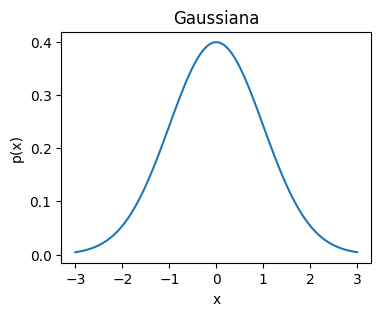

In [222]:
fig,ax=plt.subplots(figsize=(4,3))
plt.plot(x,y)
plt.title("Gaussiana")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

In [207]:
np.random.normal(0,1,(5,3))

array([[ 1.00187581, -1.90139427, -0.26931727],
       [-0.04080497,  0.20041548,  1.54890251],
       [ 0.61131173,  0.43999398,  1.65927397],
       [-2.58435844,  0.22229362, -1.20653607],
       [-0.78770602, -1.85388772,  1.90674483]])

In [208]:
np.random.normal(7,0.1,(3,4))

array([[7.00640453, 6.88492165, 7.04634343, 6.70188226],
       [7.05006841, 7.02944889, 6.87699856, 6.99482827],
       [6.71004539, 6.9607677 , 6.87005558, 6.9146828 ]])

#### Seed

A função **`seed()`** inicializa o gerador global de numeros aleatórios. Cada vez que o seed for chamado como mesmo número, as mesmas amostras serão repetidas na geração. 

In [249]:
np.random.seed(42) # fixo para reprodução
np.random.randn(1,3) 

array([[ 0.49671415, -0.1382643 ,  0.64768854]])

In [251]:
np.random.seed(42) # re-iniciando a função seed
np.random.randn(4,3) # produz os mesmos números que anteriormente

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

In [253]:
np.random.normal(0,1,(1,3)) # se não reiniciar a seed, volta a produzir novos números

array([[-0.56228753, -1.01283112,  0.31424733]])

#### O meu próprio RandomState

Você pode instanciar geradores de números, para não depender do gerador global. A classe RandomState é o gerador de números aleatórios do numpy. Você pode criar quantas instancias quiser. 

In [147]:
meu_gerador = np.random.RandomState(1234)

In [148]:
meu_gerador.normal(7,0.25,(1,3))

array([[7.11785879, 6.70225608, 7.35817674]])

#### Basic statistics

Estatística com vetores

In [258]:
np.mean(np.array([1,2,3,4,200]))

42.0

In [259]:
np.median(np.array([1,2,3,4,200]))

3.0

Estatística com matrizes

In [256]:
A = np.arange(1,13).reshape(3,4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [266]:
A.sum()

array([10, 26, 42])

In [267]:
A.sum(axis=0) #

array([15, 18, 21, 24])

In [268]:
A.sum(axis=1)

array([10, 26, 42])

Outras funções 

In [275]:
A.mean() # aceita axis=0 ou 1 

6.5

In [286]:
A.argmin()

0

In [277]:
A.argmax()

11

In [283]:
A.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66, 78])

In [285]:
 A.cumprod()

array([        1,         2,         6,        24,       120,       720,
            5040,     40320,    362880,   3628800,  39916800, 479001600])

## Referencias

1. McKINNEY, Wes. "Python for Data Science". O'Reilly, 2017.  (Cap. 4)
1. VANDERPLASS, Jake. "Python Data Science Handbook". O'Reilly, 2016. (Cap. 2)
1. https://numpy.org/devdocs/user/quickstart.html
1. https://www.youtube.com/watch?v=QUT1VHiLmmI
1. https://medium.com/data-hackers/um-pouco-de-álgebra-linear-para-data-science-305ad27cf7c

In [158]:
!python -V

Python 3.10.7


In [159]:
np.version.version

'1.24.1'